# Predictive Analytics of Diabetes in Pima Indian Females: A Diagnostic Approach
**Group Members (Group 23):**  Laksh Agarwal, Quanwei Chen, William Kawira, Lesley Mai 

## Introduction


The [dataset](https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download) chosen for this analysis originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The primary goal is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements. This dataset is particularly significant as it focuses exclusively on females of Pima Indian heritage aged 21 years and older, offering a unique perspective on diabetes prevalence and factors within this population group.

The dataset comprises several medical predictor variables alongside one target dependent variable, denoted as "Outcome," where `1` indicates the presence of diabetes and `0` represents its absence.

<img src='https://tx-urgentcare.com/wp-content/uploads/diabetes-treatment-2205.jpg' width='260'>  <img src='https://stepscan.com/wp-content/uploads/2022/06/diabetes-stats-report-724px-CDC-image.png' width='270'>

###### *Source: [Testing](https://tx-urgentcare.com/what-are-common-diabetes-treatments/);  [diabetes](https://stepscan.com/blog/diabetes-series-foot-care/)*

### Statistical Summary
- Total Observations: We will determine the exact count upon data loading, but it is implied that the data on the total number of observations is comprehensive for the study.

The dataset comprises 9 variables, including:
- Pregnancies: Integer. Range: 0-17. Number of pregnancies the patient has had.
- Glucose: Continuous. Range: 0-199 mg/dL. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- BloodPressure: Continuous. Range: 0-122 mm Hg. Diastolic blood pressure.
- SkinThickness: Continuous. Range: 0-99 mm. Triceps skin fold thickness.
- Insulin: Continuous. Range: 0-846 µU/mL. 2-Hour serum insulin level.
- BMI: Continuous. Range: 0-67.1 kg/m<sup>2</sup>. Body Mass Index.
- DiabetesPedigreeFunction: Continuous. Range: 0.078-2.42. A function that scores the likelihood of diabetes based on family history.
- Age: Integer. Range: 21-81 years.
- Outcome: Categorical. 0 or 1. Diabetes status (1 for positive, 0 for negative).

###  Data Collection Method
The data has been collected as part of a larger study aimed at understanding diabetes prevalence among Pima Indian women. It encompasses various medical measurements that are commonly associated with the diagnosis of diabetes.

## Research Question

**Find the best model to predict diabetes and figure out how these various medical predictor variables such as Glucose levels, Blood Pressure, BMI, and Age contribute to predicting diabetes in females of Pima Indian heritage?**

The question encompasses both predictive and inferential goals:

- Predictive: To identify the likelihood of diabetes onset based on key health indicators.
- Inferential: To understand the impact and significance of these indicators on diabetes prevalence.

This question aims to assess the predictive capability of various key variables in relation to diabetes. We aim to identify patterns and relationships in these variables to assist in the early detection and management of diabetes in the targeted population. This question involves both prediction, focusing on identifying individuals at risk of diabetes, and inference, aiming to comprehend the relationship between various variables and the onset of the disease.

###  Significance
This research question is significant as it targets specific factors that could potentially aid in early diabetes detection and management within a high-risk population. Addressing this question will not only contribute to academic knowledge but also inform public health strategies tailored to the Pima Indian community.

## Methods and Results

 ### A) Exploratory Data Analysis (EDA)

The dataset consists of 9 variables and 768 rows, with all the variable being continuous except Outcome. Since the missing values in this data is not inputted as NA replacing some of the 0 values in the variable that does not make sense is required. This process is done on multiple variables such as BMI, Blood Pressure, Skin Thickness, Glucose, and Insulin.

In [1]:
#loading libraries
library(tidyverse)
library(dplyr)
library(GGally)
install.packages("car")
library(car)
install.packages("leaps")
library(leaps)
install.packages("glmnet")
library(glmnet)
library(pROC)
install.packages("caret")
library(caret)
library(broom)
install.packages("stargazer")
library(stargazer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2




The downloaded binary packages are in
	/var/folders/9h/6fkyl5gs2mjcxnw_tkdqjxth0000gn/T//Rtmp4YHjrD/downloaded_packages


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some





The downloaded binary packages are in
	/var/folders/9h/6fkyl5gs2mjcxnw_tkdqjxth0000gn/T//Rtmp4YHjrD/downloaded_packages

The downloaded binary packages are in
	/var/folders/9h/6fkyl5gs2mjcxnw_tkdqjxth0000gn/T//Rtmp4YHjrD/downloaded_packages


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


also installing the dependencies ‘proxy’, ‘e1071’, ‘ModelMetrics’





The downloaded binary packages are in
	/var/folders/9h/6fkyl5gs2mjcxnw_tkdqjxth0000gn/T//Rtmp4YHjrD/downloaded_packages


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift





The downloaded binary packages are in
	/var/folders/9h/6fkyl5gs2mjcxnw_tkdqjxth0000gn/T//Rtmp4YHjrD/downloaded_packages



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [2]:
# read and wrangle data, removed all the missing values
set.seed(123)
link <- "https://raw.githubusercontent.com/PlayerTree/301/main/diabetes.csv"
datapath <- "diabetes.csv"
download.file(url = link, destfile = datapath, method = "auto")
diabetes <- read.csv(datapath)
diabetes$Outcome <- as.factor(diabetes$Outcome)
variables_incomplete <- c('Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI')
for (column in variables_incomplete) {
  diabetes[diabetes[, column] == 0, column] <- NA
}
diabetes_complete <- na.omit(diabetes)
head(diabetes_complete)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
7,3,78,50,32,88,31.0,0.248,26,1
9,2,197,70,45,543,30.5,0.158,53,1
14,1,189,60,23,846,30.1,0.398,59,1
15,5,166,72,19,175,25.8,0.587,51,1


<left><em>Table 1: Clean Diabetes Dataset</em></left>

Since the topic of interest is the relation between these variables and outcome, the side-by-side boxplot would display the relations between these variables and outcome. Another useful table would be the summary statistics of each of these variables and a simple plot of the distribution of each variables.

#### General Information
To give a general introduction to the data, we can see some of the summary statistics of the data before doing further analysis on the data

In [3]:
#overview of all the variable values will be used in the model
summary(diabetes_complete)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 56.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.:21.00  
 Median : 2.000   Median :119.0   Median : 70.00   Median :29.00  
 Mean   : 3.301   Mean   :122.6   Mean   : 70.66   Mean   :29.15  
 3rd Qu.: 5.000   3rd Qu.:143.0   3rd Qu.: 78.00   3rd Qu.:37.00  
 Max.   :17.000   Max.   :198.0   Max.   :110.00   Max.   :63.00  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0850           Min.   :21.00  
 1st Qu.: 76.75   1st Qu.:28.40   1st Qu.:0.2697           1st Qu.:23.00  
 Median :125.50   Median :33.20   Median :0.4495           Median :27.00  
 Mean   :156.06   Mean   :33.09   Mean   :0.5230           Mean   :30.86  
 3rd Qu.:190.00   3rd Qu.:37.10   3rd Qu.:0.6870           3rd Qu.:36.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outco

####  Side-by-side box plot of each variable
##### A. Pregnancies

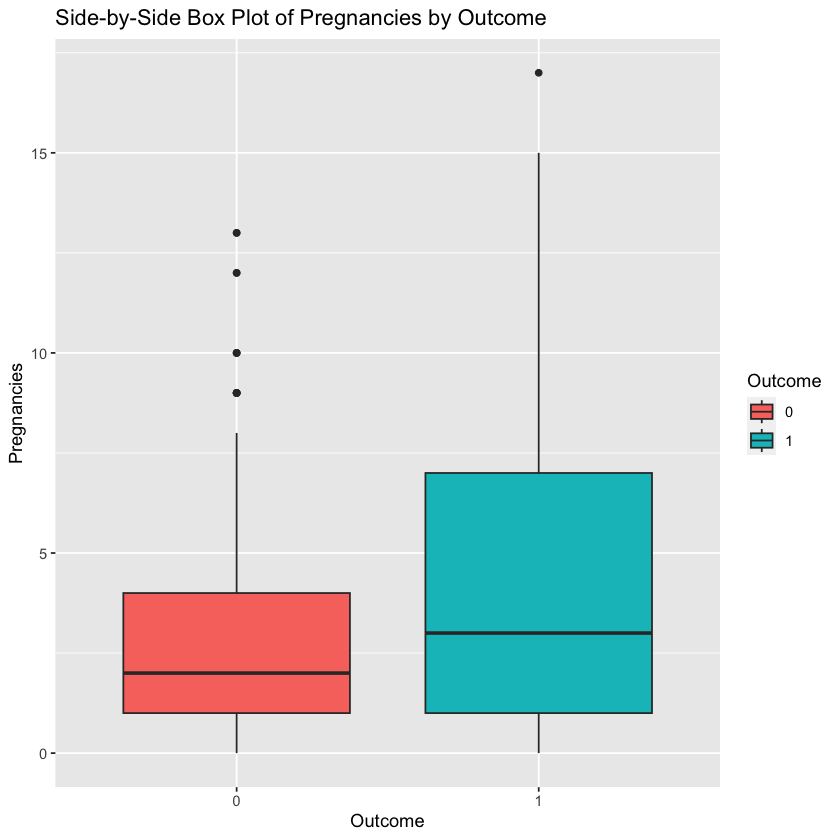

In [4]:
ggplot(diabetes_complete, aes(x = Outcome, y= Pregnancies, fill = Outcome))+
    geom_boxplot() +
    labs(title = "Side-by-Side Box Plot of Pregnancies by Outcome", x = "Outcome", y = "Pregnancies")

<left><em>Figure 1: Box Plot of Pregnancies by Outcome</em></left>

##### B. Glucose Level

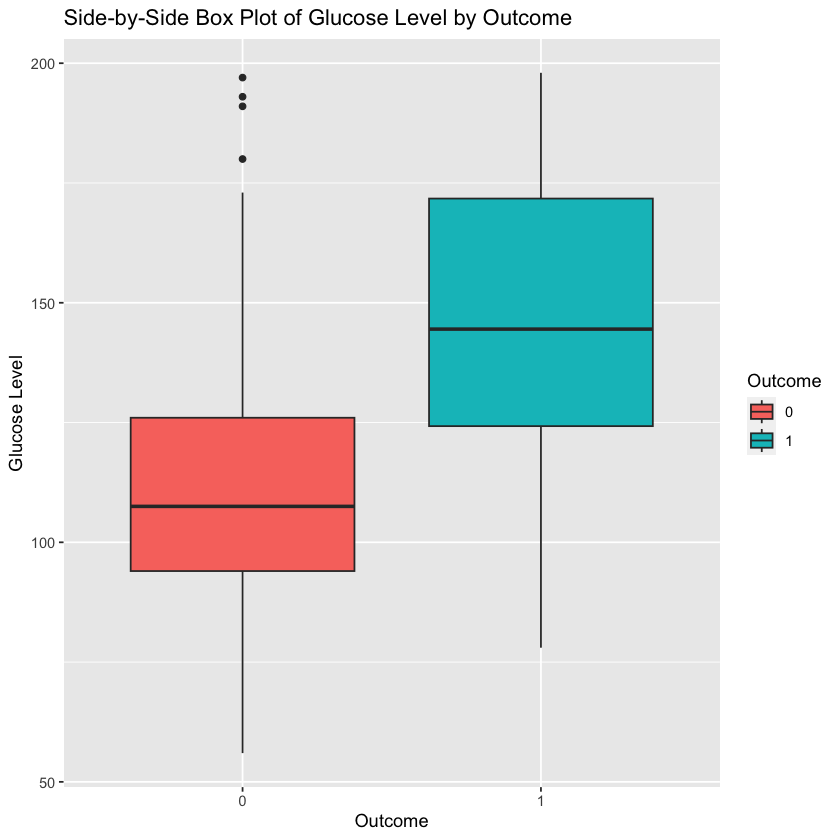

In [5]:
ggplot(diabetes_complete, aes(x = Outcome, y= Glucose, fill = Outcome))+
    geom_boxplot() +
    labs(title = "Side-by-Side Box Plot of Glucose Level by Outcome", x = "Outcome", y = "Glucose Level")

<left><em>Figure 2: Box Plot of Glucose Level by Outcome</em></left>

##### C. Blood Pressure

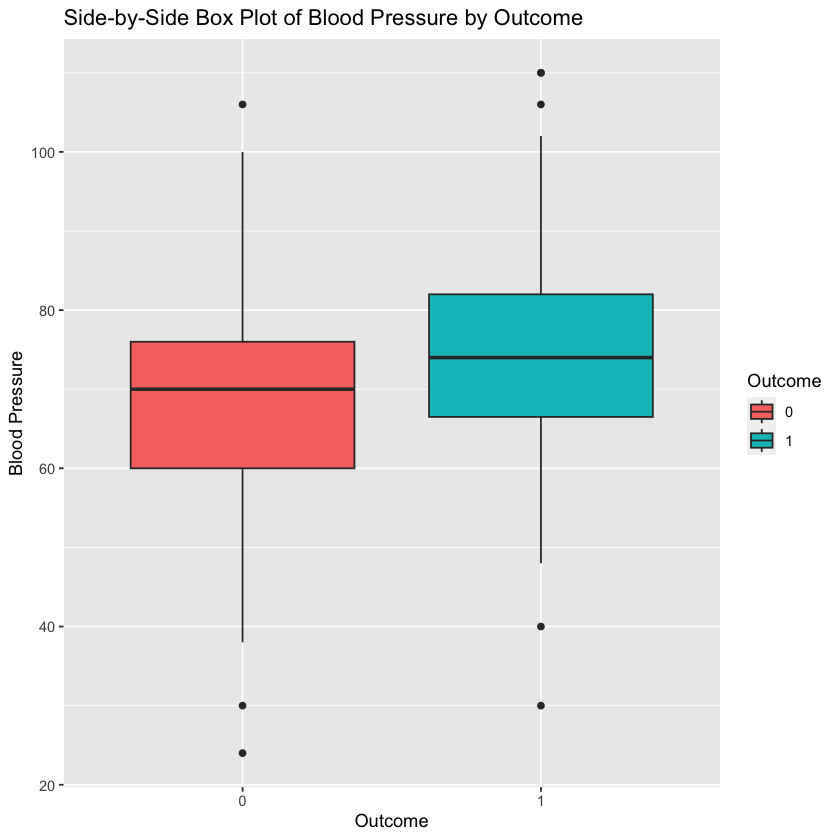

In [6]:
ggplot(diabetes_complete, aes(x = Outcome, y= BloodPressure, fill = Outcome))+
    geom_boxplot() +
    labs(title = "Side-by-Side Box Plot of Blood Pressure by Outcome", x = "Outcome", y = "Blood Pressure")

<left><em>Figure 3: Box Plot of Blood Pressure by Outcome</em></left>

##### D. Skin Thickness

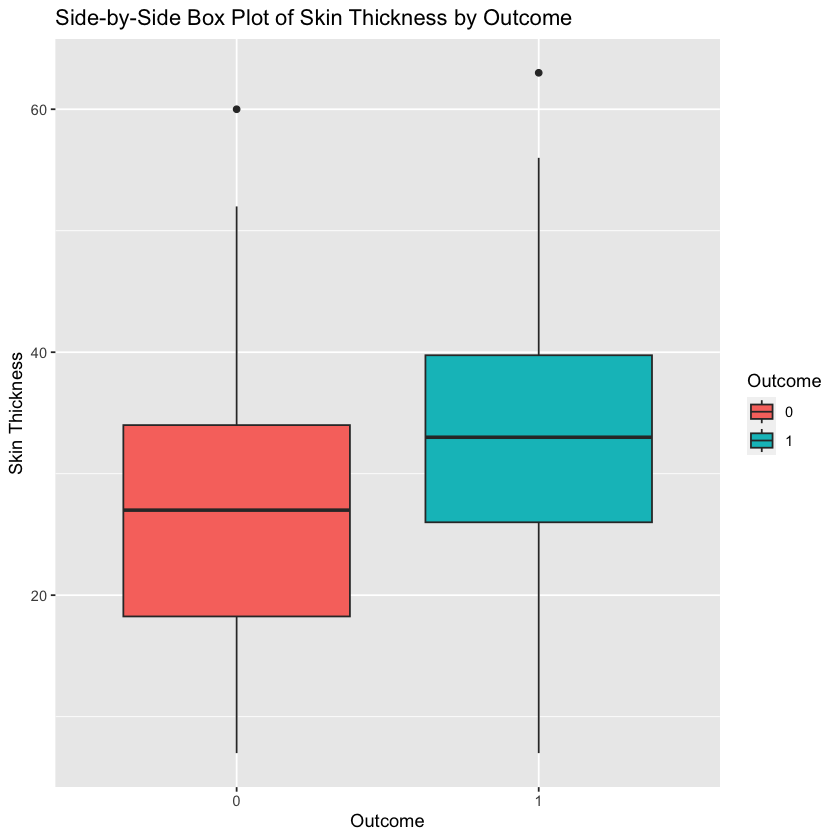

In [7]:
ggplot(diabetes_complete, aes(x = Outcome, y= SkinThickness, fill = Outcome))+
    geom_boxplot() +
    labs(title = "Side-by-Side Box Plot of Skin Thickness by Outcome", x = "Outcome", y = "Skin Thickness")

<left><em>Figure 4: Box Plot of Blood Pressure by Outcome</em></left>

##### E. Insulin Level

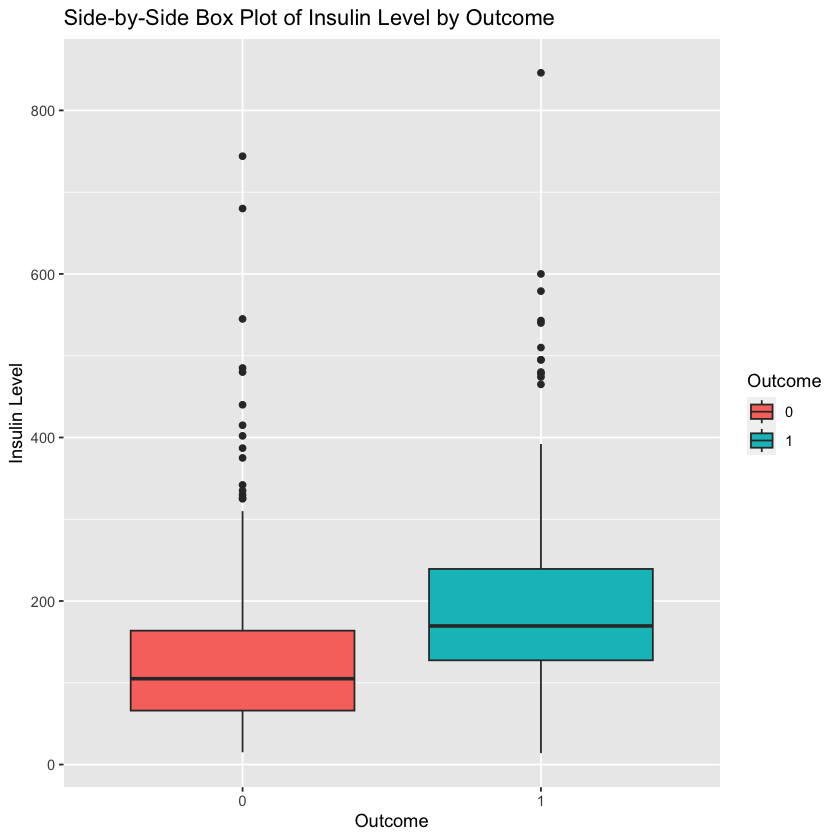

In [8]:
ggplot(diabetes_complete, aes(x = Outcome, y= Insulin, fill = Outcome))+
    geom_boxplot() +
    labs(title = "Side-by-Side Box Plot of Insulin Level by Outcome", x = "Outcome", y = "Insulin Level")

<left><em>Figure 5: Box Plot of Insulin Level by Outcome</em></left>

##### F. BMI

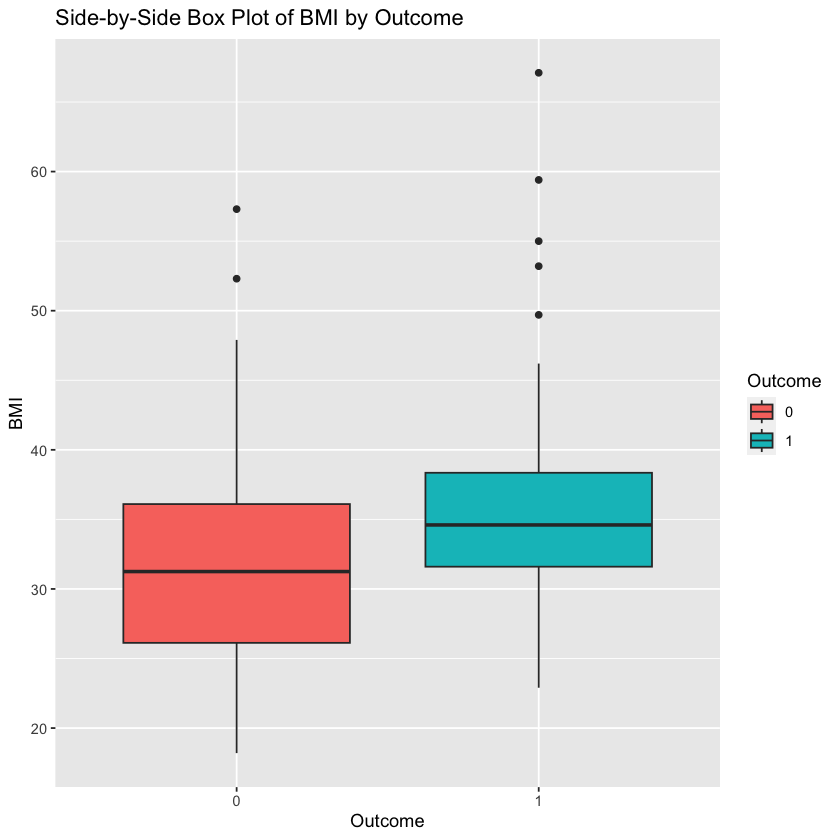

In [9]:
ggplot(diabetes_complete, aes(x = Outcome, y= BMI, fill = Outcome))+
    geom_boxplot() +
    labs(title = "Side-by-Side Box Plot of BMI by Outcome", x = "Outcome", y = "BMI")

<left><em>Figure 6: Box Plot of BMI by Outcome</em></left>

##### H. Diabetes Pedigree Function

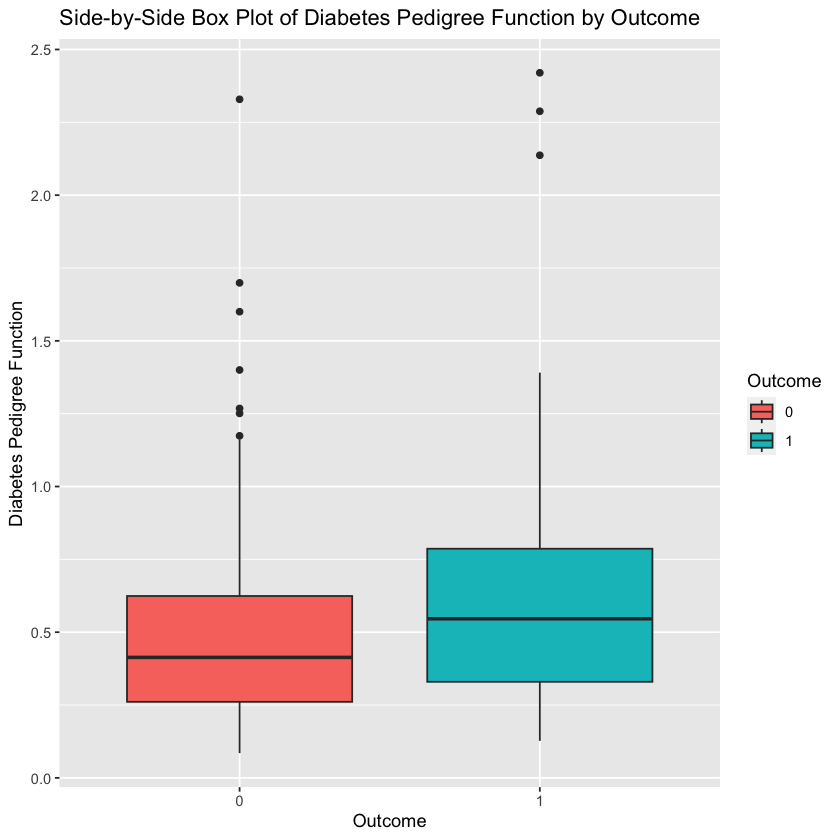

In [10]:
ggplot(diabetes_complete, aes(x = Outcome, y= DiabetesPedigreeFunction, fill = Outcome))+
    geom_boxplot() +
    labs(title = "Side-by-Side Box Plot of Diabetes Pedigree Function by Outcome", x = "Outcome", y = "Diabetes Pedigree Function")

<left><em>Figure 7: Box Plot of Diabetes Pedigree Function by Outcome</em></left>

##### I. Age

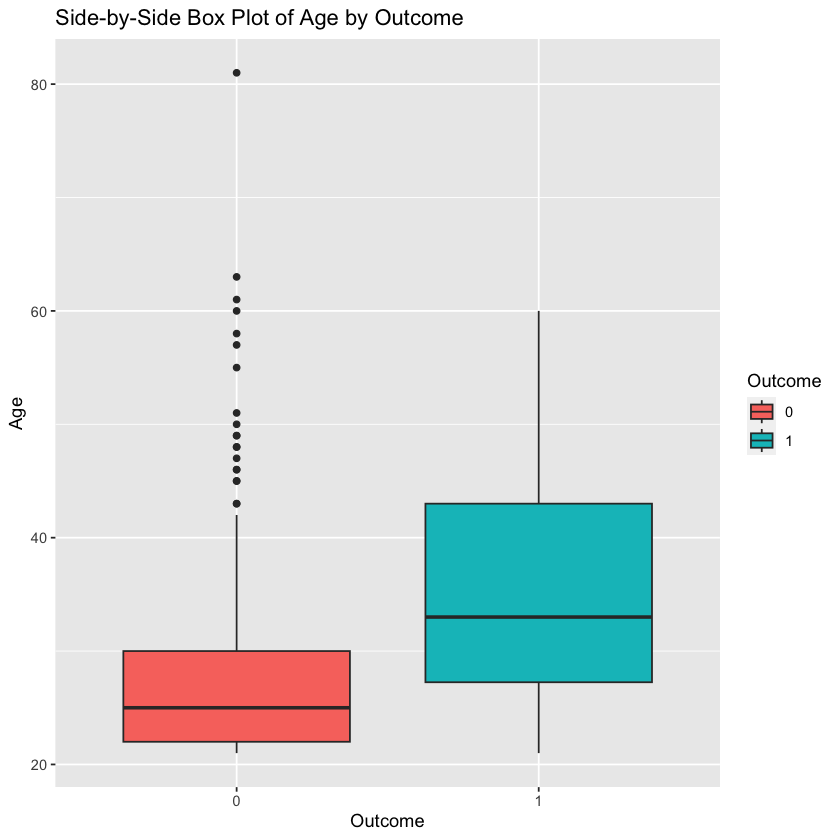

In [11]:
ggplot(diabetes_complete, aes(x = Outcome, y= Age, fill = Outcome))+
    geom_boxplot() +
    labs(title = "Side-by-Side Box Plot of Age by Outcome", x = "Outcome", y = "Age")

<left><em>Figure 8: Box Plot of Age by Outcome</em></left>

As seen from the visualization between the explanatory and response variable above, most of the variable shows some sort of disparity in values between those who have and those who does not have diabetes. This help us confirm that there might be some sort of correlation between the explanatory variables and the variable we are trying to predict.

####  Pair Plots

A GGpairs plot will help us find the correlation between variables which can help us identify multicolinearity between variables that could help usf omit or include them in my model in the future

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


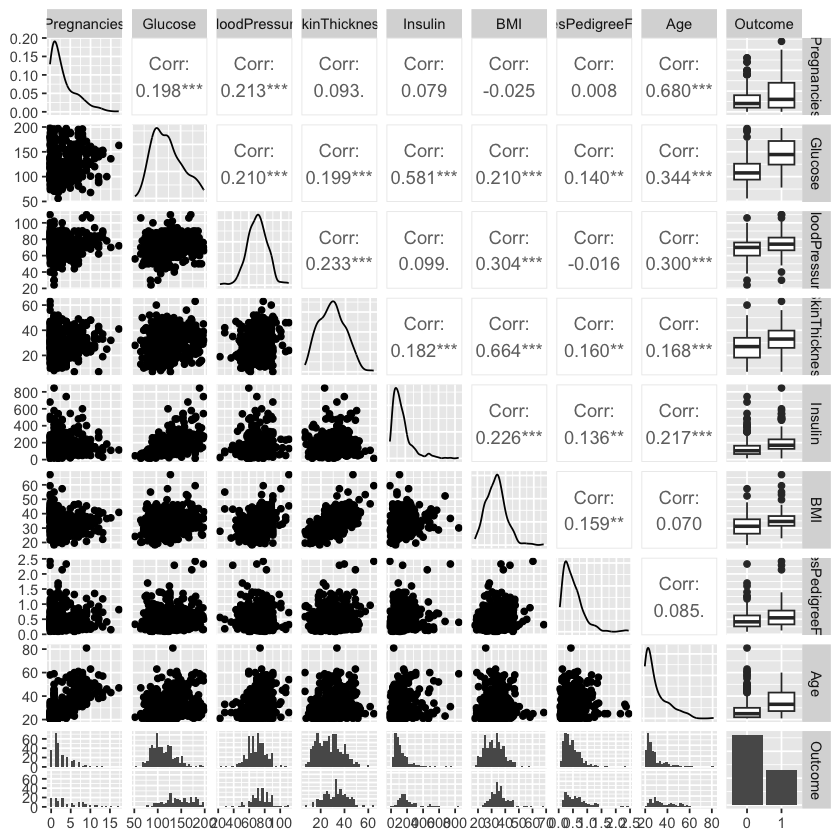

In [12]:
ggpairs(diabetes_complete)

<left><em>Figure 9: Correlation Matrix and Scatterplot Pairings of Diagnostic Variables for Pima Indian Women</em></left>

From the plot above, it seems that most of the variable listed in the dataset is highly correlated, therefore when creating the model, multicollinearity needs to be constantly analyzed as this might pose a problem in the model created.

### B) Methods: Plan

#### Methodology
##### A. General Information
To create the logistic model, we are first going to split the data into 80% and 20%, where the 80% is going to be my training data and the remaining 25% percent is going to be used as testing data. After splitting the data, we are going to cut down the number of variable using multiple variable selection method before fitting them into the model and comparing the results of these variable selection methods. After comparing the models, we would then select one of the methods which result in the best fit to the model. To fit a logisitic model, we would need to make sure that all the variable is independent, and no multicollinearity exist. Other than, we need to check for AROC and ROC.

##### B. Variable Selection
To find the best predictors and creating the best fitted logistic model for my main research question, we are going to select the variable using the forward selection method, backward selection method, and lasso method to create a logistic regression model. We have selected these method as we are not trying to preserve the number of variable, but rather cut down as much variable while preserving its accuracy as possible as collecting these variable in real life scenario would increase the cost of the treatment. 

The forward selection method advantages is it does not require much computational power and is generally faster than the other 2 method. This method is better when the dataset is smaller. The disadvantages of the forward selection method is that the method is likely to overfit and does not take into account multicollinearity.

The backward selection method on the other hand, counters overfitting, works well with more variable, and is not likely to overfit, but this method is more computationally taxing and may discard useful variables during its pruning of variables.

The lasso method deals with multicollinearity and are able to prevent overfitting by penalizing the coefficients, it also works well with dataset with a lot of variables. Similar to the backward selection, this method may also prune important variables.

And for the other problem of trying to create a model finding a model to predict body mass index from insulin level , glucose level, pregnancies, and the outcome of the diabetes. We would just do a regression and find the coefficients of the model.

##### C. Model Evaluation
The model created from the variables selected will be a logistic regression model where the output will be the probability of the person having diabetes. The model generated from these variable will most likely just be additive since interaction between these variables are not reasonable. To compare the fit between the model to the actual data, we are going to use AROC and ROC, while also looking at the F-score for each model. Since, the data we have would be probability of the patient having diabetes and the data we would have in the testing data would be a boolean value, we would have to set a threshold for the ROC and AROC method. This threshold would be calculated using the training data to fit most of the result, meaning that if using 0.5 as the threshold would result in the most accurate prediction, we will set 0.5 as the threshold to use in the testing data.

##### D. Assumptions

The assumptions of logistic regression include:

- The outcome variable should be binary.
  
- There should be little or no multicollinearity among the independent variables.
  
- There should be a large enough sample size to ensure reliable results.

##### E. Potential Limitations or Weaknesses

- **Overfitting:** With forward selection, there's a risk of overfitting the model to the training data, especially if the initial set of variables contains many irrelevant or redundant ones.
  
- **Selection Bias:** Forward selection may introduce bias toward variables that are not actually significant but happen to improve the model during the stepwise process.
  
- **Multicollinearity:** Since the method adds variables one by one, it may not account for multicollinearity well, potentially leading to inflated coefficients.
  
- **Complexity:** As more variables are added, the model becomes more complex, which can make interpretation more challenging.

##### F. Model Interpretation

Interpret the final model's coefficients and assess the impact of each selected variable on the binary outcome. 


#### Feature Selection

As most of us used the same methods to do the feature selection method, which are backward selection, forward selection, and lasso. Using these method we have come up with some selection of covariates which are similar in AUC value. In the end we have selected the model with 3 covariates which are Glucose, Diabetes Pedigree Function, and Age. We come up to this conclusion as the performance of the other models is very similar to this model, and this model used the least number of variables which is an advantage to most of the models which uses 4 variables.

In [13]:
# DataSplit, creating testing set (used for model evaluation) and training set (used for model fitting)
set.seed(42)
trainIndex <- sample(1:nrow(diabetes_complete), 0.8 * nrow(diabetes_complete))
train_data <- diabetes_complete[trainIndex, ]
test_data <- diabetes_complete[-trainIndex, ]

install.packages("PRROC")
install.packages("pROC")

library(pROC)      
library(MASS)      
library(yardstick) 
library(PRROC)
library(glmnet)



The downloaded binary packages are in
	/var/folders/9h/6fkyl5gs2mjcxnw_tkdqjxth0000gn/T//Rtmp4YHjrD/downloaded_packages

The downloaded binary packages are in
	/var/folders/9h/6fkyl5gs2mjcxnw_tkdqjxth0000gn/T//Rtmp4YHjrD/downloaded_packages



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘yardstick’


The following objects are masked from ‘package:caret’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:readr’:

    spec




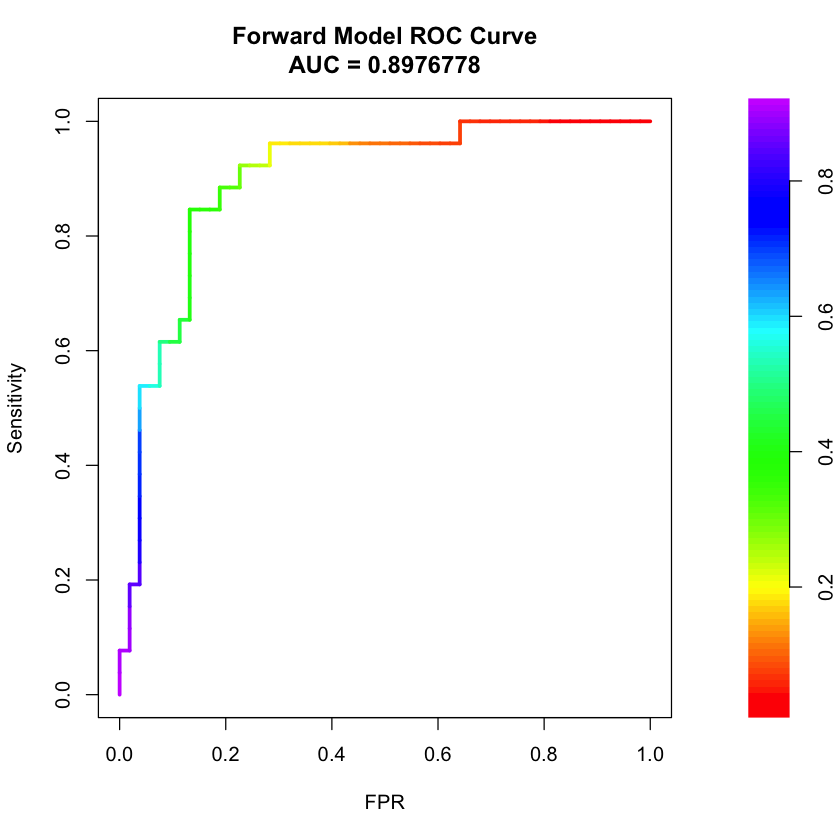

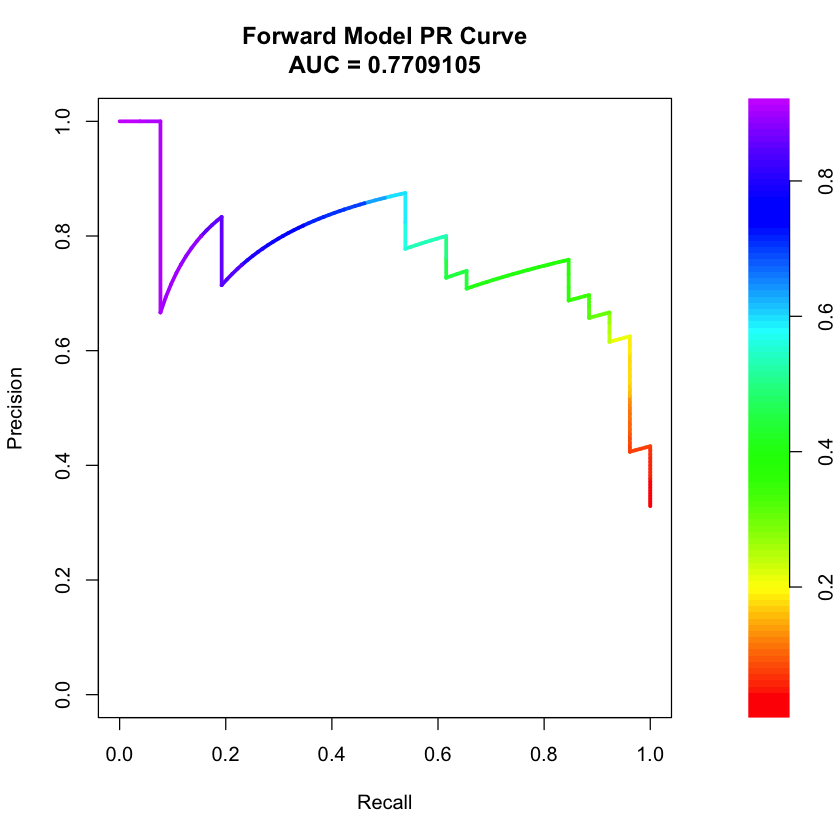

In [14]:
# perform forward selection to choose the best model including ROC curve preview for the best model
forward_model <- stepAIC(glm(Outcome ~ ., data = train_data, family = "binomial"), direction = "forward", trace = FALSE)
forward_prob <- predict(forward_model, newdata = test_data, type = "response")
test_data$Outcome <- as.numeric(as.character(test_data$Outcome))
roc_curve_forward <- roc.curve(scores.class0 = forward_prob, weights.class0= test_data$Outcome, curve = T)
plot(roc_curve_forward, main = "Forward Model ROC Curve")
pr_curve_forward <- pr.curve(scores.class0 = forward_prob, weights.class0 = test_data$Outcome, curve = T)
plot(pr_curve_forward, auc.main = TRUE, auc.type = "integral", legend = TRUE, main = "Forward Model PR Curve")

<left><em>Figure 10: Evaluation of Predictive Performance for Diabetes Diagnosis Using Forward Selection Model - ROC and PR Curves</em></left>

In [15]:
# the description of the final model
summary(forward_model)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BloodPressure + 
    SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + 
    Age, family = "binomial", data = train_data)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.309342   1.345590  -6.918 4.57e-12 ***
Pregnancies               0.067247   0.061131   1.100   0.2713    
Glucose                   0.036841   0.006312   5.837 5.33e-09 ***
BloodPressure            -0.004729   0.013684  -0.346   0.7296    
SkinThickness             0.016822   0.019046   0.883   0.3771    
Insulin                  -0.001188   0.001386  -0.857   0.3914    
BMI                       0.052714   0.030177   1.747   0.0807 .  
DiabetesPedigreeFunction  0.997098   0.467373   2.133   0.0329 *  
Age                       0.043704   0.020877   2.093   0.0363 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    

##### From the model above we obtain the result of P(Y = 1 | X) = 1/1+e^-(-9.31 + 0.037 * Glucose + 0.044 * Age + 1 * DiabetesPedigreeFunction)

This coefficients in this model all significant, with the ROC AUC being 0.89 and the PR AUC being 0.77. This value compared to the other model we have proposed indicates that this model performs better than the other models, since most of the other model have ROC AUC value between 0.8 to 0.83

**Test Data Description:**
- The test data comprises 20% of the original dataset, randomly selected.
- It consists of observations from individual females of Pima Indian heritage.
- The dataset includes information such as age, glucose levels, and other health factors.
- Each person's diabetes status is also included.
- This test data allows us to evaluate the performance of our model in predicting diabetes for new individuals who were not part of the training data.


## Discussions 

### Summarize what you found, and the implications/impact of your findings


After performing an analysis, it was determined that the logistic regression model was a highly effective predictive method for diabetes status, with age, diabetes pedigree function, and glucose level serving as the primary predictors. By applying a rigorous feature selection process to our refined logistic regression model, we confirmed the significance of these variables. The predictive capability of the model is not compromised by its narrow focus; instead, it captures the crucial interaction among these three variables and the prevalence of diabetes, providing a concise yet effective method for predicting the onset of the disease.


### If relevant, discuss whether your results were what you expected to find

The anticipated efficacy of our logistic regression model in forecasting diabetes was due to the quantitative features of the variables involved. The calibration of the model to these predictors emphasizes its accuracy and potential practicality in clinical settings. Diabetes is a multifactorial condition that displays complexity. However, the model has reduced the complexity of prediction to three variables that possess significant effect sizes. By finding a balance between functionality and complexity, this simplified model demonstrates that in the field of diabetes prediction, more is not always better. Our model serves as evidence for the principle that understanding which factors are fundamental to the pathophysiology of the disease is where precision lies. The results were in line with what we expected, as known diabetes risk factors like Glucose and Age were identified as significant predictors across all models.

### Discuss how your model could be improved

- While the models performed well, there's still room for improvement. One way to enhance them could be by including additional relevant predictors specific to females of Pima Indian heritage, such as genetic factors or cultural influences.
 - Validating the models on different datasets from females of Pima Indian heritage would also help ensure their reliability and applicability in various settings.
- One way to enhance the model's predictive performance is by incorporating interaction terms among variables. Currently, the model only considers additive interactions, but more complex interactions could be explored to capture nonlinear relationships and potential synergistic effects between predictors.
- By including interaction terms, the model can better account for the interplay between different risk factors and provide a more nuanced understanding of their combined influence on diabetes risk.


### Discuss future questions/research this study could lead to

- Future studies could compare the predictors of diabetes in females of Pima Indian heritage with those in females from different ethnic backgrounds to determine if similar factors are responsible for diabetes risk across cultures.
- Investigating potential differences in diabetes risk factors among diverse female populations could provide insights into genetic, environmental, and lifestyle factors contributing to disease development.
- Understanding why certain factors may have differing effects on diabetes risk across different cultural groups could inform more targeted interventions and public health strategies.
- Additionally, exploring how cultural and social determinants of health influence diabetes risk in females from various backgrounds could help address health disparities and promote equitable access to healthcare services.
- By examining diabetes risk factors in a broader context of cultural diversity, researchers can contribute to a more comprehensive understanding of the disease and develop more inclusive and effective prevention and management strategies tailored to the needs of diverse populations.


## References

- Longato, E., Fadini, G. P., Sparacino, G., Avogaro, A., Tramontan, L., & Di Camillo, B. (2021). A deep learning approach to predict diabetes' cardiovascular complications from administrative claims. IEEE Journal of Biomedical and Health Informatics, 25(9), 3608-3617. https://doi.org/10.1109/JBHI.2021.3065756

- Coetzee, A., Sadhai, N., Mason, D., Hall, D. R., & Conradie, M. (2020). Evidence to support the classification of hyperglycemia first detected in pregnancy to predict diabetes 6–12 weeks postpartum: A single center cohort study. Diabetes Research and Clinical Practice, 169, 108421-108421. https://doi.org/10.1016/j.diabres.2020.108421